In [181]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [182]:
new_df = pd.read_csv(".devcontainer/new_cars_prices.csv")
used_df = pd.read_csv(".devcontainer/used_car_prices.csv")

print(new_df.info())
print("\n2nd DATASET\n")
print(used_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  3433 non-null   object
 1   Car Model          3433 non-null   object
 2   Old Price          3433 non-null   object
 3   Price Change       3433 non-null   object
 4   New Price          3433 non-null   object
 5   date_range         3433 non-null   object
dtypes: object(6)
memory usage: 161.0+ KB
None

2nd DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  79090 non-null  object
 1   Car Model          79090 non-null  object
 2   Month/Year         78612 non-null  object
 3   Average price      78612 non-null  object
 4   Minimum price      78612 non-null  object
 5   Maximum price  

In [183]:
#Drop the useless column
new_df.drop('web-scraper-order', axis=1, inplace=True)
used_df.drop('web-scraper-order', axis=1, inplace=True)

In [184]:
#Get rid of dupes
new_df.dropna(inplace = True)
new_df.drop_duplicates(inplace = True)
used_df.dropna(inplace = True)
used_df.drop_duplicates(inplace = True)

duplicates1 = new_df.duplicated().sum()
duplicates2 = new_df.duplicated().sum()

print(f"Number of duplicates: {duplicates1} and {duplicates2}")

Number of duplicates: 0 and 0


In [185]:
print(new_df.columns)
print(used_df.columns)

Index(['Car Model', 'Old Price', 'Price Change', 'New Price', 'date_range'], dtype='object')
Index(['Car Model', 'Month/Year', 'Average price', 'Minimum price',
       'Maximum price'],
      dtype='object')


In [186]:
print(new_df.dtypes)
print("\n")
print(used_df.dtypes)

Car Model       object
Old Price       object
Price Change    object
New Price       object
date_range      object
dtype: object


Car Model        object
Month/Year       object
Average price    object
Minimum price    object
Maximum price    object
dtype: object


In [187]:
print(new_df.sample(5))
print("\n")
print(used_df.sample(5))

                                            Car Model     Old Price  \
3068  Mitsubishi Eclipse Cross A/T / Inspire GLS 2023  840,000\nEGP   
1674              Citroën C5 Aircross A/T / Live 2022  435,000\nEGP   
1115                Renault Megane A/T / Dynamic 2022  424,000\nEGP   
2643               Bestune T77 Pro A/T / Premium 2023  555,000\nEGP   
3387                       Jac J7 A/T / Ultimate 2022  399,900\nEGP   

                    Price Change     New Price  date_range  
3068  trending_up\n +70,000\nEGP  910,000\nEGP  07/03/2023  
1674   trending_up\n+14,900\nEGP  449,900\nEGP  18/10/2021  
1115   trending_up\n+11,000\nEGP  435,000\nEGP  02/06/2022  
2643   trending_up\n+80,000\nEGP  635,000\nEGP  06/09/2022  
3387   trending_up\n+15,000\nEGP  414,900\nEGP  31/05/2022  


                   Car Model Month/Year Average price Minimum price  \
18738       Kia Picanto 2013    2018-05   165,000 EGP   158,000 EGP   
28735  Citroën C Elysee 2020    2021-06   177,000 EGP   176,000

In [188]:
# Clean and convert to string
new_df['New Price'] = new_df['New Price'].str.replace(',', '').str.replace('EGP', '').astype(float)
new_df["Old Price"]= new_df["Old Price"].str.replace(',', '').str.replace('EGP', '').astype(float)

new_df['Price Change'] = new_df['Price Change'].str.replace(r'[^-\d]+', '').astype(float)

new_df['Car Brand'] = new_df['Car Model'].apply(lambda i:"".join(i.split(" ")[0]))
new_df['Car_Model_Name'] = new_df['Car Model'].apply(lambda i:" ".join(i.split(" ")[1:-1]))
new_df['Car_Model_Year'] = new_df['Car Model'].apply(lambda i:"".join(i.split(" ")[-1]))

new_df.sample(5)

/tmp/ipykernel_8885/4120024754.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,Car Model,Old Price,Price Change,New Price,date_range,Car Brand,Car_Model_Name,Car_Model_Year
2321,Chery Arrizo 5 AT / BASELINE Leather / CVT 2023,310000.0,19000.0,329000.0,31/10/2022,Chery,Arrizo 5 AT / BASELINE Leather / CVT,2023
2608,Bestune T55 A/T / PREMIUM PLUS 2023,440000.0,50000.0,490000.0,08/04/2022,Bestune,T55 A/T / PREMIUM PLUS,2023
1105,Renault Megane A/T / Vision 2022,395000.0,99000.0,494000.0,03/11/2022,Renault,Megane A/T / Vision,2022
2924,Audi Q7 A/T / S Line 2022,2300000.0,250000.0,2550000.0,15/11/2022,Audi,Q7 A/T / S Line,2022
1367,Hyundai I10 A/T / Elite 2022,275000.0,10000.0,285000.0,08/05/2022,Hyundai,I10 A/T / Elite,2022


In [189]:
new_df["Price Change"].head()

0    -82876.0
1    184149.0
2    -93000.0
3    125124.0
4   -350000.0
Name: Price Change, dtype: float64

In [190]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78612 entries, 0 to 79089
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      78612 non-null  object
 1   Month/Year     78612 non-null  object
 2   Average price  78612 non-null  object
 3   Minimum price  78612 non-null  object
 4   Maximum price  78612 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [191]:
used_df.head()

,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"


In [192]:
used_df["Average price"] = used_df["Average price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)
used_df["Minimum price"] = used_df["Minimum price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)
used_df["Maximum price"] = used_df["Maximum price"].astype(str).str.replace(',', '').str.replace('EGP', '').astype(float)

In [193]:
used_df.sample(5)

,Car Model,Month/Year,Average price,Minimum price,Maximum price
74510,Skoda Felicia 1995,2018-12,50000.0,46000.0,52000.0
43965,Chevrolet Lanos 2017,2022-10,150000.0,141000.0,157000.0
25088,BMW 316 2007,2018-06,230000.0,220000.0,235000.0
77151,Geely Fruits 2005,2016-10,24000.0,23000.0,25000.0
21712,Chevrolet Optra 2013,2020-12,135000.0,128000.0,143000.0


      Old Price  Price Change  New Price
0     2262876.0      -82876.0  2180000.0
1     2078727.0      184149.0  2262876.0
2     2388000.0      -93000.0  2295000.0
3     2262876.0      125124.0  2388000.0
4     5600000.0     -350000.0  5250000.0
...         ...           ...        ...
3428   779900.0       35000.0   814900.0
3429  1149000.0      170000.0  1319000.0
3430  1070000.0       79000.0  1149000.0
3431   899900.0      170100.0  1070000.0
3432   864900.0       35000.0   899900.0

[3432 rows x 3 columns]
       Average price  Minimum price  Maximum price
0           967000.0       926000.0      1017000.0
1           979000.0       931000.0      1045000.0
2           917000.0       893000.0       950000.0
3           881000.0       793000.0       950000.0
4           868000.0       789000.0       950000.0
...              ...            ...            ...
79085        30000.0        26000.0        33000.0
79086        33000.0        32000.0        35000.0
79087        28000.0    

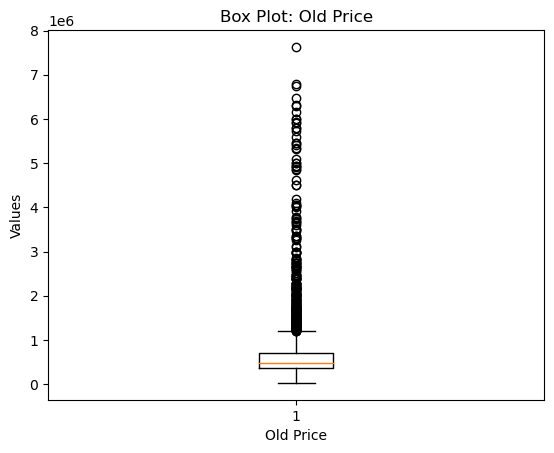

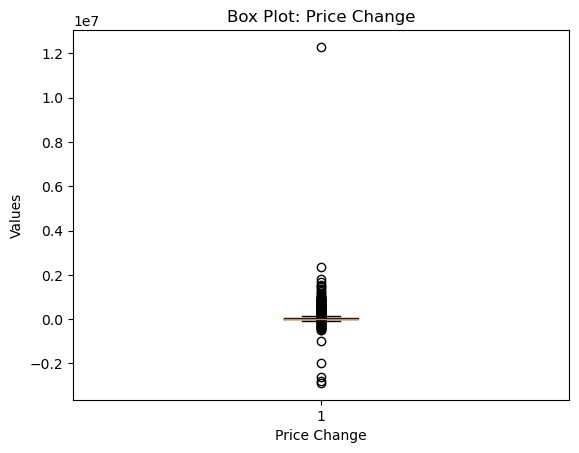

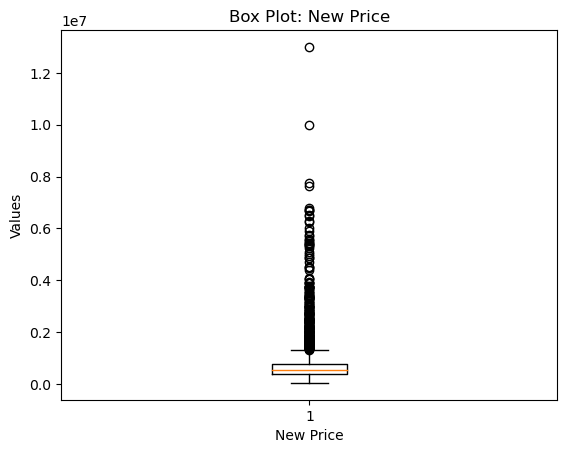

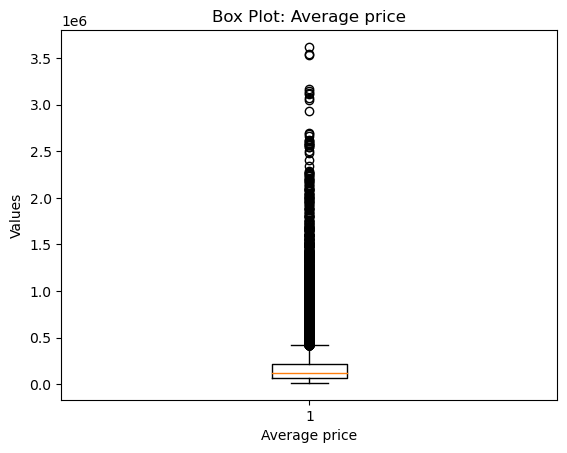

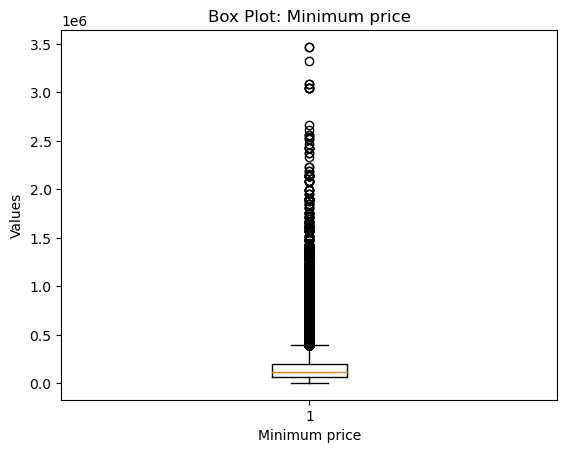

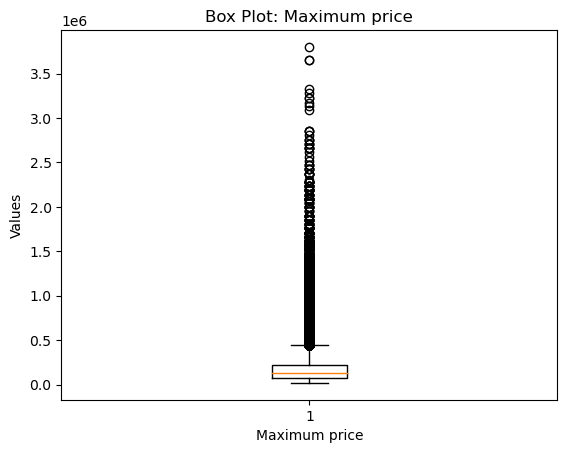

In [194]:
#check for outliers in boxplot

# df1 for new cars, df2 for used cars
num_df = new_df.select_dtypes(include = "number")
num_df2 = used_df.select_dtypes(include = "number")
print(num_df)
print(num_df2)

for column in num_df.columns:
    plt.boxplot(num_df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()

for column in num_df2.columns:
    plt.boxplot(num_df2[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()


      Old Price  Price Change  New Price
17     500000.0       70000.0   570000.0
18     465000.0       35000.0   500000.0
19     420000.0       45000.0   465000.0
20     417000.0        3000.0   420000.0
21     405000.0       12000.0   417000.0
...         ...           ...        ...
3422   890000.0       39000.0   929000.0
3424   719990.0       30000.0   749990.0
3426   964000.0       65000.0  1029000.0
3428   779900.0       35000.0   814900.0
3432   864900.0       35000.0   899900.0

[2856 rows x 3 columns]
       Average price  Minimum price  Maximum price
1143        326000.0       320000.0       330000.0
1144        304000.0       285000.0       315000.0
1145        309000.0       285000.0       325000.0
2796        332000.0       328000.0       333000.0
2797        332000.0       328000.0       333000.0
...              ...            ...            ...
79085        30000.0        26000.0        33000.0
79086        33000.0        32000.0        35000.0
79087        28000.0    

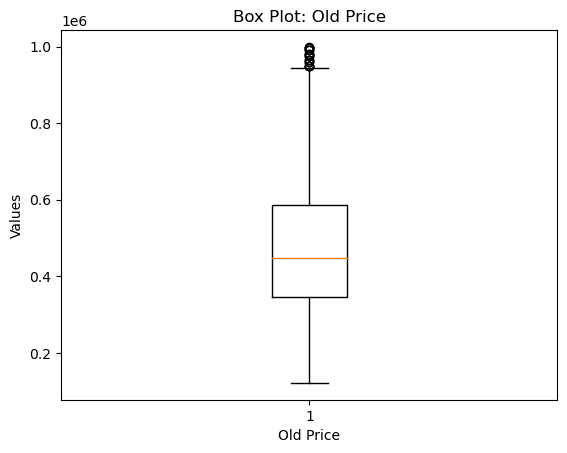

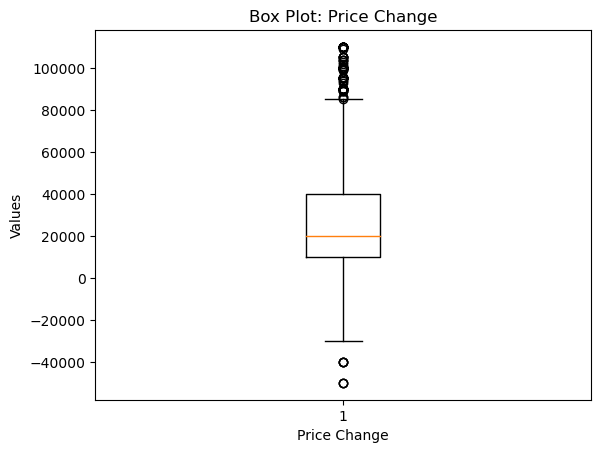

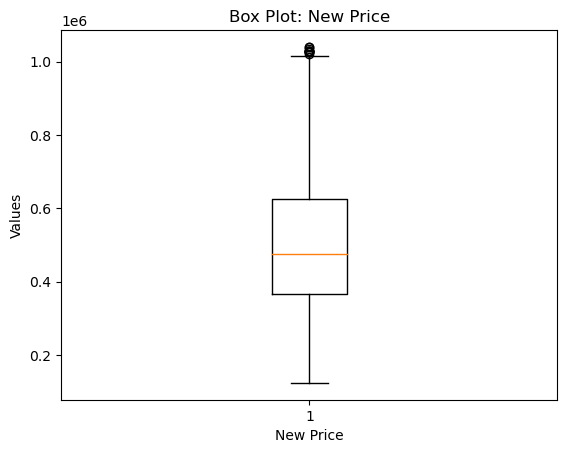

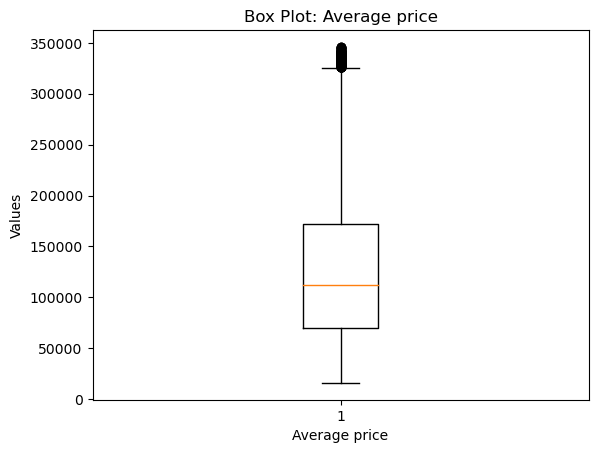

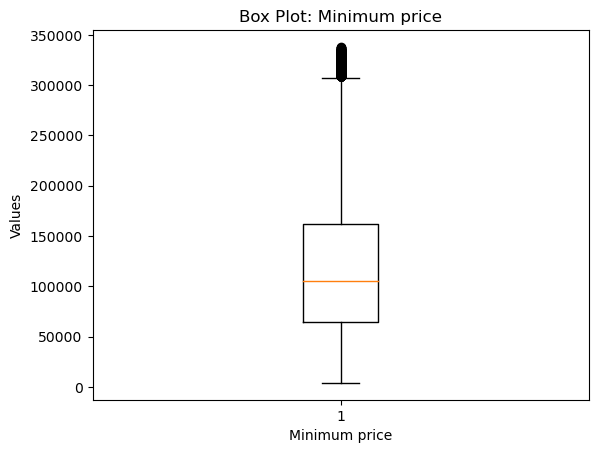

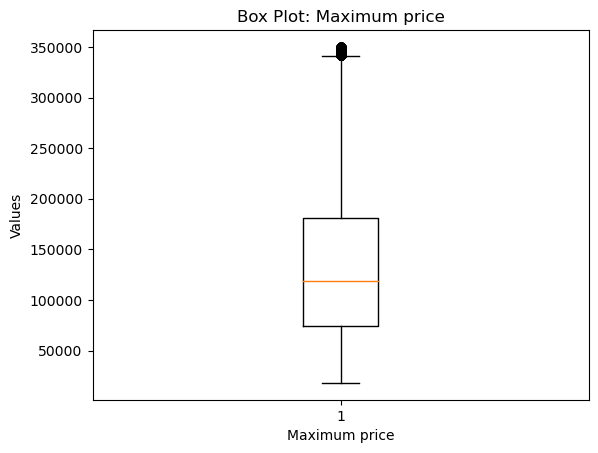

In [195]:
# Get rid of outliers

threshold = 1.5

# Iterate over each column in num_df
for column in num_df.columns:
    # Calculate the IQR
    q1 = num_df[column].quantile(0.25)
    q3 = num_df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Filter out the outliers
    num_df[column] = np.where(
        (num_df[column] >= lower_bound) & (num_df[column] <= upper_bound),
        num_df[column],
        np.nan
    )

    num_df = num_df.dropna(how='any')

for column in num_df2.columns:
    # Calculate the IQR
    q1 = num_df2[column].quantile(0.25)
    q3 = num_df2[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Filter out the outliers
    num_df2[column] = np.where(
        (num_df2[column] >= lower_bound) & (num_df2[column] <= upper_bound),
        num_df2[column],
        np.nan
    )
    
    num_df2 = num_df2.dropna(how='any')

# Display the modified DataFrame
print(num_df)
print(num_df2)

for column in num_df.columns:
    plt.boxplot(num_df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()

for column in num_df2.columns:
    plt.boxplot(num_df2[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title('Box Plot: {}'.format(column))
    plt.show()


In [200]:
# Update the original DF with outliers removed

new_df["New Price"] = num_df["New Price"]
new_df["Old Price"] = num_df["Old Price"]
new_df["Price Change"] = num_df["Price Change"]

used_df["Average price"] = num_df2["Average price"]
used_df["Minimum price"] = num_df2["Minimum price"]
used_df["Maximum price"] = num_df2["Maximum price"]

In [201]:
print(used_df.head())
print(new_df.head())

               Car Model Month/Year  Average price  Minimum price  \
0  Skoda Octavia A8 2022    2023-03            NaN            NaN   
1  Skoda Octavia A8 2022    2023-02            NaN            NaN   
2  Skoda Octavia A8 2022    2023-01            NaN            NaN   
3  Skoda Octavia A8 2022    2022-12            NaN            NaN   
4  Skoda Octavia A8 2022    2022-11            NaN            NaN   

   Maximum price  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
                          Car Model  Old Price  Price Change  New Price  \
0  Porsche Cayenne A/T / Coupe 2020        NaN           NaN        NaN   
1  Porsche Cayenne A/T / Coupe 2020        NaN           NaN        NaN   
2      Porsche Cayenne A/T / S 2020        NaN           NaN        NaN   
3      Porsche Cayenne A/T / S 2020        NaN           NaN        NaN   
4        Lexus LX 570 Automtic 2020        NaN           NaN        NaN   

   date_range Car Br

In [202]:
#Get rid of null values
new_df = new_df.dropna(how='any')
used_df = used_df.dropna(how='any')
print(new_df.sample(5))
print(used_df.sample(5))

                                           Car Model  Old Price  Price Change  \
1797               Suzuki Vitara A/T / Two tone 2022   367000.0       10000.0   
186                       Changan Eado A/T / L2 2022   299900.0        3100.0   
2955  Forthing T5 evo Automtic / luxury / black 2022   540000.0       20000.0   
2046                     Subaru XV A/T / Luxury 2022   939000.0       20000.0   
3382                      Jac J7 A/T / Ultimate 2022   489900.0       40000.0   

      New Price  date_range Car Brand                    Car_Model_Name  \
1797   377000.0  12/03/2022    Suzuki             Vitara A/T / Two tone   
186    303000.0  14/06/2022   Changan                     Eado A/T / L2   
2955   560000.0  15/08/2022  Forthing  T5 evo Automtic / luxury / black   
2046   959000.0  28/02/2023    Subaru                   XV A/T / Luxury   
3382   529900.0  11/10/2022       Jac                 J7 A/T / Ultimate   

     Car_Model_Year  
1797           2022  
186            202

In [ ]:
# Handle the Month/Year column of 